In [1]:
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
%matplotlib inline

from run import solvers, NXs
import run

In [2]:
execfile('../../matplotlibrc.py')

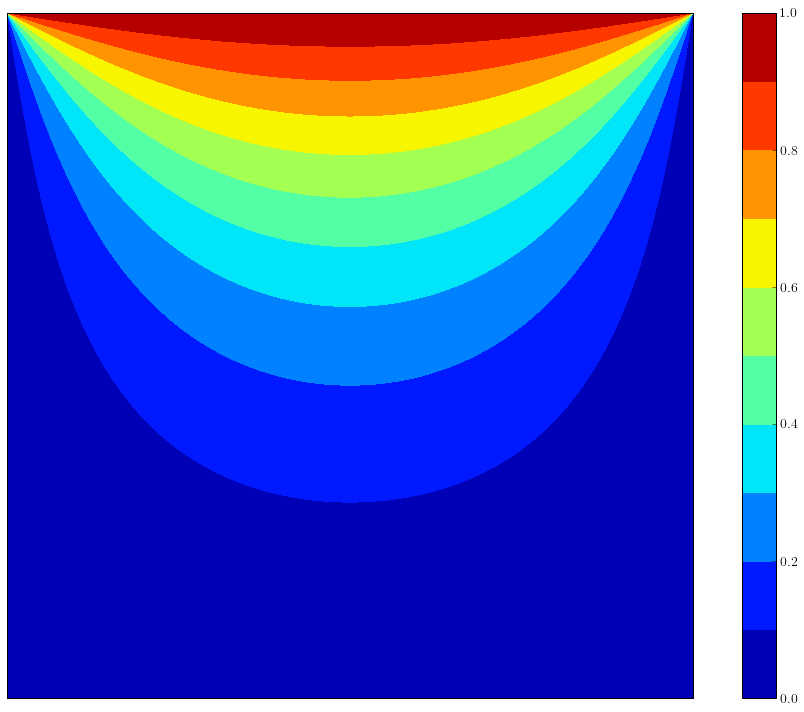

In [31]:
# Question 3
fig, ax = plt.subplots(figsize=(14, 10))
u = np.loadtxt('dat/Gauss_400_u.dat')
u = u.reshape((400, 400))
x = np.linspace(0, 1, 401)
levels = np.linspace(0, 1, 11)
ax.set_xticks([])
ax.set_yticks([])
CS = ax.contourf(u, levels=levels)

ax.set_aspect('equal', 'box')
cbar = fig.colorbar(CS)
cbar.ax.tick_params(labelsize=14) 
fig.tight_layout()
fig.savefig('tex/figs/q3.pdf', dpi=400)

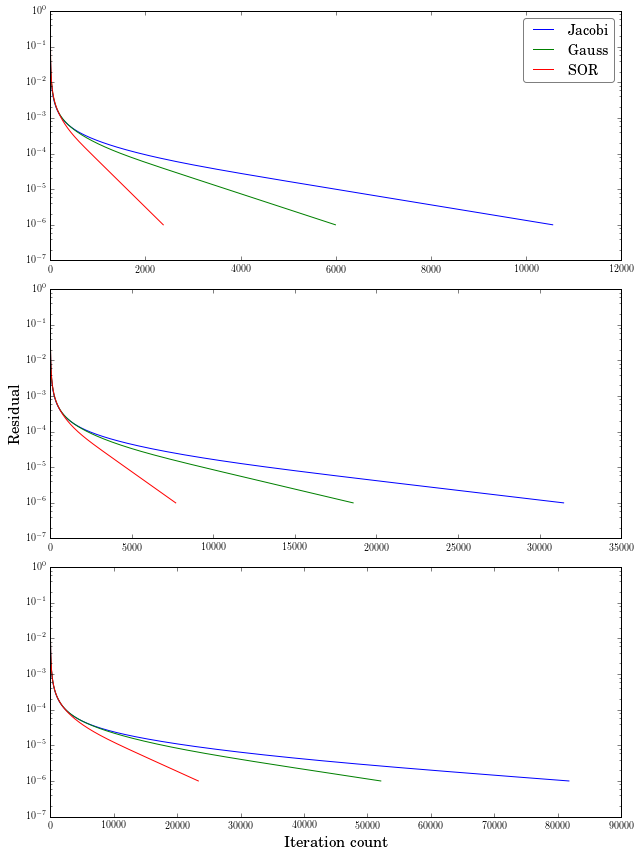

In [97]:
# Question 4
fig, axes = plt.subplots(nrows=3, figsize=(9, 12))
for nx, ax in zip(NXs, axes):
    for solver in solvers:
        prefix = '%s_%i' % (solver, nx)
        r = np.loadtxt('dat/%s_r.dat' % prefix)
        ax.semilogy(r, label=solver)
axes[0].legend()
axes[1].set_ylabel('Residual')
axes[2].set_xlabel('Iteration count')
fig.tight_layout()
fig.savefig('tex/figs/q4.pdf', dpi=400)

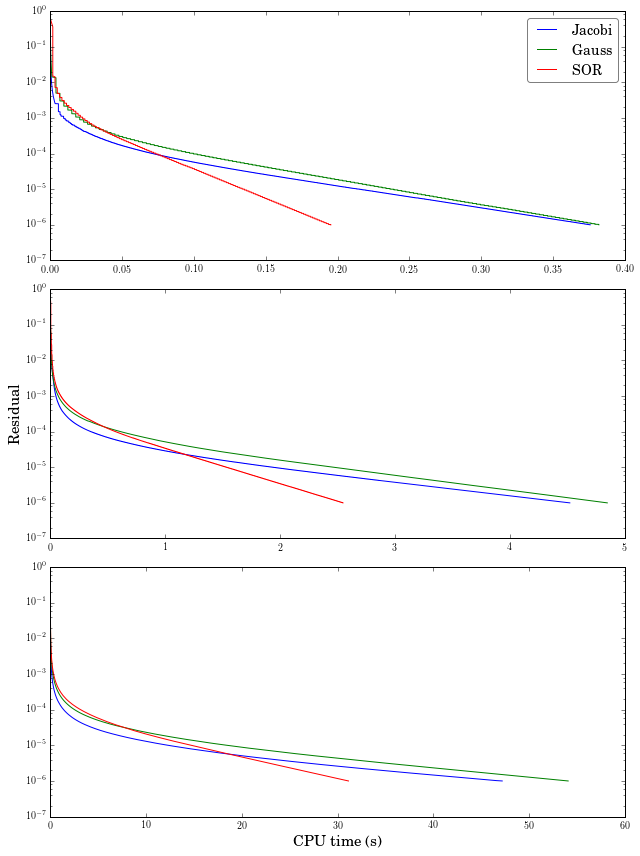

In [98]:
# Question 5
fig, axes = plt.subplots(nrows=3, figsize=(9, 12))
for nx, ax in zip(NXs, axes):
    for solver in solvers:
        prefix = '%s_%i' % (solver, nx)
        r = np.loadtxt('dat/%s_r.dat' % prefix)
        t = np.loadtxt('dat/%s_t.dat' % prefix)
        ax.semilogy(t, r, label=solver)
axes[0].legend()
axes[1].set_ylabel('Residual')
axes[2].set_xlabel('CPU time (s)')
fig.tight_layout()
fig.savefig('tex/figs/q5.pdf', dpi=400)

In [24]:
# Question 5 table
import ast

In [29]:
time_data = ast.literal_eval(open('time_data.py').read())
tablehead = r'''\newcommand{\mct}[1]{\multicolumn{2}{c}{#1}}
\newcommand{\pht}{\phantom{a}}
\newcommand{\mrt}[1]{\multirow{4}{*}{#1}}
\begin{table}[H]
\caption{Performance comparison of Gauss and Jacobi using different
optimization levels. All runs converged with a tolerance of 
$10^{-6}$.}
\label{tab:performance}
\centering
\begin{tabular}{@{}r cc c cc c cc @{}}
    \toprule
    & \mct{Iterations} & \pht & \mct{Time per Iteration} & \pht & \mct{Total Time}\\
    &         &        & \pht & \mct{($10^{-5}$ s)}        & \pht & \mct{(s)}       \\   
    \cmidrule{2-3} \cmidrule{5-6} \cmidrule {8-9}
     & Jacobi & Gauss && Jacobi & Gauss && Jacobi & Gauss\\
    \midrule
'''
tablefoot = r'''
    \bottomrule
\end{tabular}
\end{table}'''
olevels = ['-g', '-O1', '-O2', '-O3']
row_names = ['g', 'O1', 'O2', 'O3']
row_names = ['%6s' % name for name in row_names]
formats = ['%5.2f', '%5.1f', '%5.f']
slvs = [1,2]
lines = []
for nx, fmt in zip([100, 200, 400], formats):
    lines.append('$N = %i$\\\\' % nx)
    iters = ['%i'%time_data[olevels[0]][slv][nx][0] for slv in slvs]
    iter_first = [r'\mrt{%s}'%i for i in iters]
    for olevel, name in zip(olevels, row_names):
        if olevel == '-g':
            iters = [r'\mrt{%i}'%time_data[olevel][slv][nx][0] for slv in slvs]
        else:
            iters = ['' for slv in slvs]
        time_per_iter = ['%.0f'%(time_data[olevel][slv][nx][1]/1e-5)
                         for slv in slvs]
        total_time = [fmt%time_data[olevel][slv][nx][2] for slv in slvs]
        vals = ' && '.join(
            [' & '.join(field) for field in [iters, time_per_iter, total_time]]
        )
        line = name + ' & ' + vals + ' \\\\'
        lines.append(line)
#### Extra Manual Data

body = '\n'.join(lines)
table = '\n'.join([tablehead, body, tablefoot])
# print(body)
open('tex/q4table.tex', 'w').write(table)

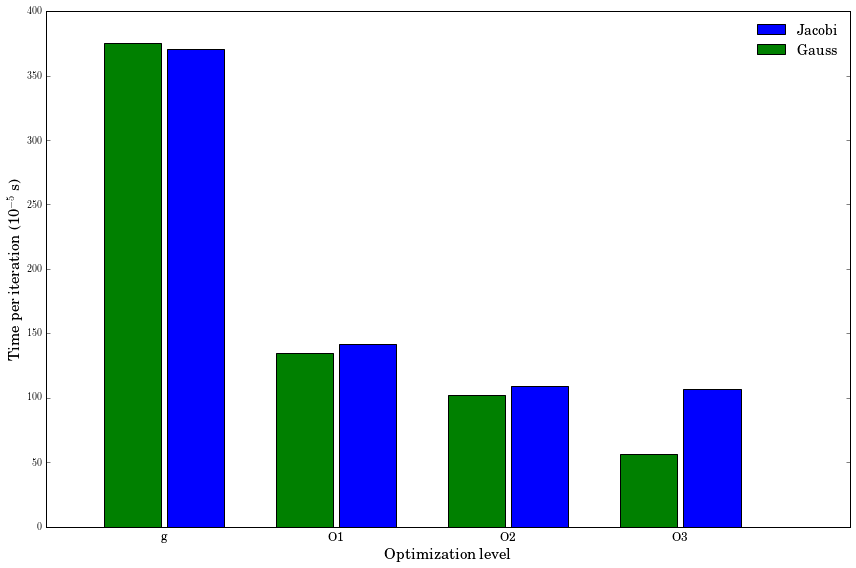

In [26]:
fig, ax = plt.subplots(figsize=(12, 8 ))

width = 0.05
N = 4
coffset = 0.9
sep = width/10

olevels = ['-g', '-O1', '-O2', '-O3']
get_times_per_iter = lambda slv: [time_data[olevel][slv][400][1]/1e-5
                         for olevel in olevels]
jacobi_vals = get_times_per_iter(1)
jacobi_coords = 0.15*np.arange(N) + width
gauss_vals = get_times_per_iter(2)
gauss_coords = jacobi_coords + width + sep

gauss_bars = ax.bar(gauss_coords, gauss_vals, width=width, color='b')
jacobi_bars = ax.bar(jacobi_coords, jacobi_vals, width=width, color='g')

ax.legend((gauss_bars[0], jacobi_bars[0]), ('Jacobi', 'Gauss'),
          loc='best', frameon=False)

xticks = gauss_coords - 0.5*sep
xlbls = [olevel[1:] for olevel in olevels]

ax.set_xticks(xticks)
ax.set_xticklabels(xlbls, fontsize='large')
ax.tick_params(axis='x', which='major', length=0, bottom='off', top='off')

ax.set_xlabel('Optimization level')
ax.set_ylabel('Time per iteration (10$^{-5}$ s)')
fig.tight_layout()
fig.savefig('tex/figs/histogram.pdf')

In [3]:
from run import all_relax

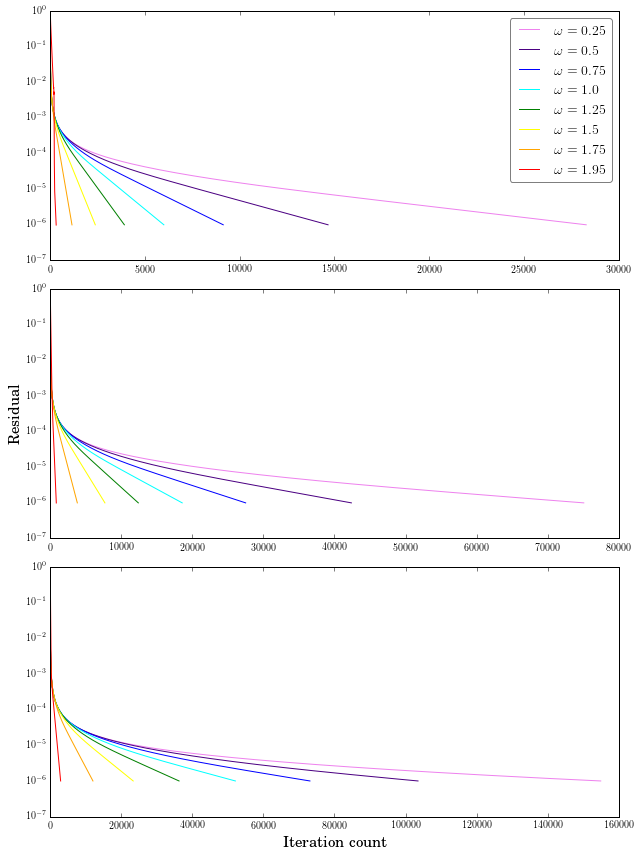

In [99]:
# Question 7
fig, axes = plt.subplots(nrows=3, figsize=(9, 12))
rainbow = ['r', 'orange', 'yellow', 'green', 'cyan', 'blue', 'indigo', 'violet']
# colors = ['b', 'g', 'r', 'c', 'm', 'darkorange', 'k', 'seagreen']
for nx, ax in zip(NXs, axes):
    for color, relax in zip(reversed(rainbow), all_relax):
        prefix = '%.2f_%i' % (relax, nx)
        r = np.loadtxt('sordat/%s_r.dat' % prefix)
        ax.semilogy(r, color=color, label='$\\omega = %s$' % relax)
        ax.tick_params(axis='y', which='both', length=0, left='off', right='off')
axes[0].legend()
axes[1].set_ylabel('Residual')
axes[2].set_xlabel('Iteration count')

fig.tight_layout()
fig.savefig('tex/figs/q7.pdf', dpi=400)

# Question 6

In [20]:
from run import Uexact

In [21]:
# Numerical Analytical Solution at y = 1
Uex = Uexact(400, do_bc=False)

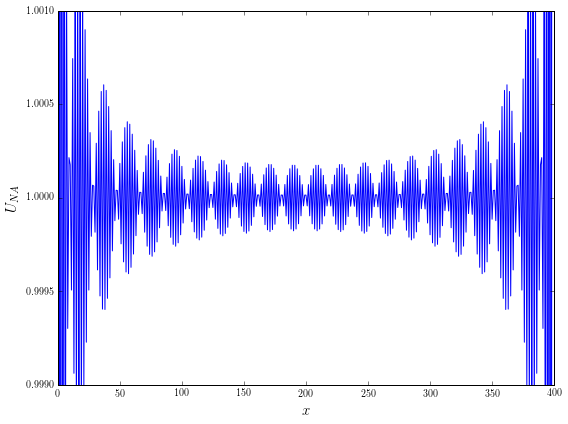

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(Uex[-1])
ax.set_ylim(0.999, 1.001)
ax.set_xlabel('$x$')
ax.set_ylabel('$U_{NA}$')
fig.tight_layout()
fig.savefig('tex/figs/topanal.pdf')
# plt.show()

In [18]:
from matplotlib.colors import LogNorm

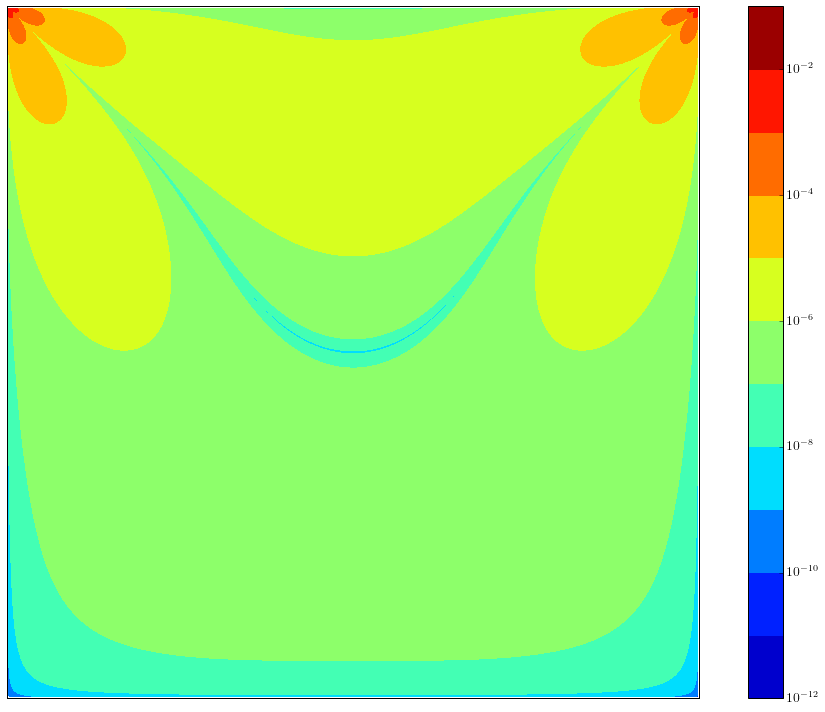

In [34]:
nx = 400
Uex = np.load('Uexact/Uex_%i.npy' % nx).reshape((nx, nx))
U = np.loadtxt('dat_precise/Gauss_%i_u.dat' % nx).reshape((nx, nx))
fig, ax = plt.subplots(figsize=(14, 10))
Z = np.abs(U - Uex)
CS = ax.contourf(Z, norm=LogNorm())
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal', 'box')
cbar = fig.colorbar(CS)
cbar.ax.tick_params(labelsize=14) 
fig.tight_layout()
fig.savefig('tex/figs/errplot.pdf', dpi=400)

In [3]:
from run import NXs_lots

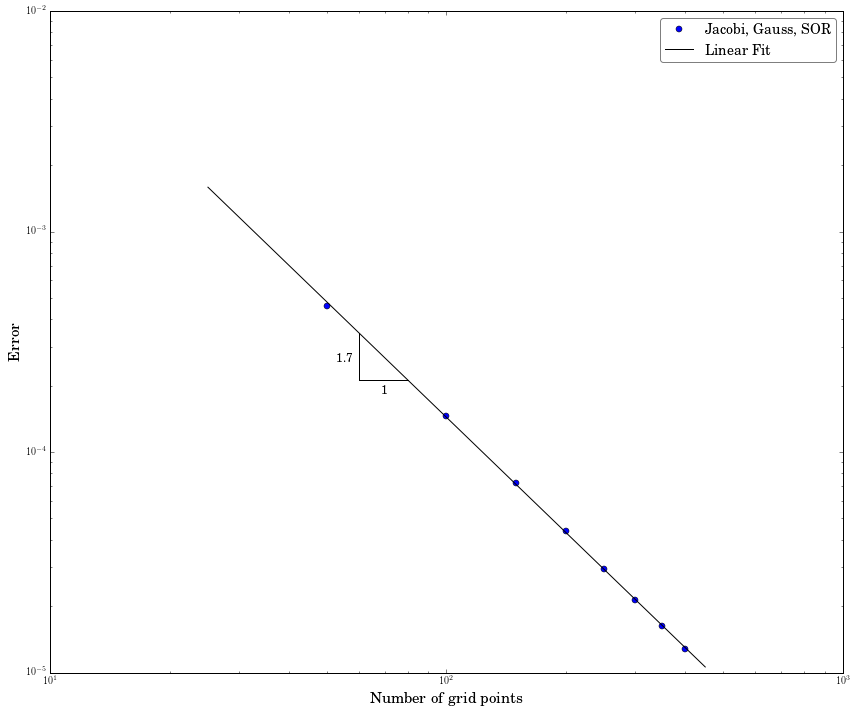

In [40]:
# Question 6

def fit(x, y, deg):
    coefs = np.polyfit(np.log(x), np.log(y), deg)
    slope = coefs[0]
    poly = np.poly1d(coefs)
    return poly, slope
        
fig, ax = plt.subplots(figsize=(12, 10))
all_nx = np.array(NXs_lots)
DX = [1./(nx - 1) for nx in all_nx]
norm = partial(np.linalg.norm, ord=1)
for solver in solvers[:1]:
    errors = []
    for nx in all_nx:
        Ux = np.load('Uexact/Uex_%i.npy' % nx).flatten()
        prefix = '%s_%i' % (solver, nx)
        U = np.loadtxt('dat_precise/%s_u.dat' % prefix)
        errors.append(
            np.float(norm(np.abs(Ux - U))/norm(Ux))
        )
    
    ax.loglog(all_nx[::2], errors[::2], 'bo', label='Jacobi, Gauss, SOR')

# Fit line

poly, R = fit(all_nx, errors, 1)
poly_fit = lambda x: np.exp(poly(np.log(x)))
points = np.array([25, 75, 125, 450])
line = poly_fit(points)
ax.loglog(points, line, 'k-', label='Linear Fit')
a = 60
b = 80
ya = poly_fit([a])
yb = poly_fit([b])
line1x = [a, a]
line1y = [ya, yb]
line2x = [a, b]
line2y = [yb, yb]
ax.loglog(line1x, line1y, 'k')
ax.loglog(line2x, line2y, 'k')
ax.annotate('1', [0.5*(a+b), yb*0.87], ha='center', fontsize=12)
ax.annotate('%.1f' % abs(R), [a*0.88, 0.48*(ya + yb)], va='center', fontsize=12)
ax.set_ylabel('Error')
ax.set_xlabel('Number of grid points')
ax.legend(numpoints=1)
# ax.set_ylim((errors[-1]*0.9, errors[0]*1.1))
fig.tight_layout()
plt.show()
fig.savefig('tex/figs/orderaccuracy.pdf', dpi=400)